# Google Playstore


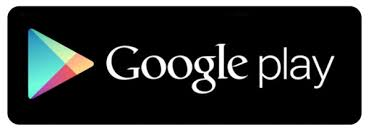



 #### This dataset is taken from [Kaggle](https://www.kaggle.com/). 
 ###### This notebook covers the cleaning and exploration of data for 'Google Play Store Apps'.
 
 In this dataset we have
 
 - `App`: Application name
 - `Category`: Category the app belongs to
 - `Rating`: Overall user rating of the app 
 - `Reviews`: Number of user reviews for the app 
 - `Size`: Size of the app 
 - `Installs`: Number of user downloads/installs for the app 
 - `Type`: Paid or Free
 - `Price`: Price of the app 
 - `Content Rating`: Age group the app is targeted at - Children / Mature 21+ / Adult
 - `Genres`: An app can belong to multiple genres . For eg, a musical family game will belong to Music, Game, Family genres.
 - `Last Updated`: Date when the app was last updated on Play Store 
 - `Current Ver`: Current version of the app available on Play Store 
 - `Android Ver`: Min required Android version 

## Downloading the Dataset

 We are using a helper library called `opendatasets`, which contains a collection of curated datasets and provides a function for directly download.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/lava18/google-play-store-apps/download' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: prathyusham01
Your Kaggle Key: ········


100%|██████████| 1.94M/1.94M [00:00<00:00, 97.1MB/s]

The dataset has been downloaded and extracted.

In [4]:
data_dir = './google-play-store-apps'

In [5]:
import os
os.listdir(data_dir)

['googleplaystore.csv', 'license.txt', 'googleplaystore_user_reviews.csv']

Here we can see that there are 3 files in the dataset that are downloaded. `2 CSV files` and `1 txt file`

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "google-playstore-project" 

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "prathyusha4501/google-playstore-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/prathyusha4501/google-playstore-project


'https://jovian.ml/prathyusha4501/google-playstore-project'

# Data Preparation and Cleaning

**TODO** - Importing the libraries, loading the dataset, finding the quantity and quality of dataset according to our need, Checking the statstical values, null values.

`All the above steps consider under Data Preparation and Cleaning`



## Importing Librariers

In [10]:
import numpy as np
import pandas as pd


## Loading the dataset

In [11]:
googleplay = pd.read_csv('google-play-store-apps/googleplaystore.csv')

## Quick peek inside the dataset

In [12]:
googleplay.head(15)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


## About the dataset 

### Shape of dataset

In [13]:
print("The shape of the dataset:",googleplay.shape)

The shape of the dataset: (10841, 13)


### Names of Columns

In [14]:
googleplay.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

### Stastical values about dataset

In [15]:
googleplay.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### Little deep info

In [16]:
googleplay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Cleaning and sorting data

### Check for unique values

In [17]:
googleplay.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

### Checking for null values

In [18]:
googleplay.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Here we have `1474` null values in the dataset

### Removing the dataset

In [19]:
googleplay=googleplay.dropna()
googleplay.shape

(9360, 13)

### Converting the `Last Updated` from `object` to `datetime64`

In [20]:
googleplay["Last Updated"] = pd.to_datetime(googleplay["Last Updated"])
googleplay["Rating"].astype(int)
googleplay.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [21]:
googleplay['Rating'].dtype

dtype('float64')

## Splitting the dataset according to their `Price`

In [22]:
free_apps = googleplay[googleplay['Type'] == 'Free']
paid_apps = googleplay[googleplay['Type'] == 'Paid']

## Exploratory Analysis by Categories

### Type of `apps`

In [23]:
googleplay['Type'].value_counts()

Free    8715
Paid     645
Name: Type, dtype: int64

### Type of `Category`

In [24]:
googleplay['Category'].value_counts()

FAMILY                 1746
GAME                   1097
TOOLS                   733
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         312
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

### Type of `Price`

In [25]:
googleplay['Price'].value_counts().sort_values(ascending=False)

0          8715
$2.99       114
$0.99       106
$4.99        70
$1.99        59
           ... 
$14.00        1
$2.56         1
$379.99       1
$3.04         1
$15.99        1
Name: Price, Length: 73, dtype: int64

### Type of `rating`

In [26]:
googleplay['Rating'].value_counts().sort_index(ascending=False)

5.0     274
4.9      87
4.8     234
4.7     499
4.6     823
4.5    1037
4.4    1108
4.3    1076
4.2     951
4.1     707
4.0     567
3.9     386
3.8     303
3.7     239
3.6     174
3.5     163
3.4     128
3.3     102
3.2      63
3.1      69
3.0      83
2.9      45
2.8      42
2.7      25
2.6      25
2.5      21
2.4      19
2.3      20
2.2      14
2.1       8
2.0      12
1.9      13
1.8       8
1.7       8
1.6       4
1.5       3
1.4       3
1.2       1
1.0      16
Name: Rating, dtype: int64

In [27]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


# Exploratory Analysis and Visualization

**TODO** -`Exploratory data analysis` is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Paid or Free based apps

In [ ]:
plt.figure(figsize=(7,5))
#plt.xticks(rotation=90)
plt.title('Type based apps');
plt.rc('font',size=15)
sns.countplot(googleplay['Type'],palette='Set2');

* People like to install `Free` apps compared to `Paid` ones

## Overall user rating of the app

In [ ]:
hist=googleplay['Rating'].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
googleplay["Rating"].plot(kind='density', color='teal')
plt.rc('font',size=10)
plt.title(' Range of reviews');
plt.grid()
plt.xlim(0,5)
plt.show()

* The range of reviews are high at range og 3.5 to 4.5

## Based on the `Content Rating ` what type of apps have high installs

In [ ]:
plt.figure(1, figsize=(20, 7))
plt.rc('font',size=20)
plt.title("Content Rating")
sns.countplot(x = "Content Rating", order=googleplay['Content Rating'].value_counts().index[0:4] ,data=googleplay,palette='Blues');

* By seeing the above figure we can easily say that the apps that are availbale to everyone has large number od installs compared to the age restriction ones

## Number of user reviews for the app

In [ ]:
plt.figure(1, figsize=(20, 7))
plt.title("Reviwes of apps")
sns.countplot(x = "Reviews", order=free_apps['Reviews'].value_counts().index[0:15] ,data=googleplay,palette='Set1')
plt.rc('font',size=30)


* By the above figure, We can see that count of reviews by people to the apps 

## Count of installs in google playstore

In [ ]:
plt.figure(1, figsize=(25, 10))
plt.rc('font',size=20)
plt.title("Installs")
sns.countplot(x = "Installs", order=googleplay['Installs'].value_counts().index[0:4] ,data=googleplay,palette='Set2');

## Sub-plots based on `Category`, `Installs`, `Type`,`Content Rating`

In [ ]:
def bar_plot(x,y,y_label,x_label,title,color,ax):
    # plt.figure(figsize=(10,5))
    bar = sns.barplot(x = x,y=y,ax=ax,orient='h')
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(title)
    for i, v in enumerate(x.values):
        ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')
    return bar

In [ ]:
list_1 = ['Category', 'Installs', 'Type','Content Rating']

In [ ]:
fig = plt.figure(figsize=(25,25))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
i = 1
for names in list_1:
    ax1 = fig.add_subplot(2, 2, i)
    df2 = googleplay[names].value_counts()
    df2 = df2.reset_index()
    bar_plot(x = df2[names],y = df2['index'],y_label = 'Freq',title = 'Bar Chart On {}'.format(names),color='red',ax=ax1,x_label=names)
    i += 1

Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian

In [ ]:
jovian.commit()

# Asking and Answering Questions

### Q1: Which catogory of apps have high installs from `Google play store`

In [ ]:
free_apps['Category'].value_counts()[0:1]

In [ ]:
paid_apps['Category'].value_counts()[0:1]


* By seeing, We can sat that `Family` category of apps are highly installed in both free and paid versions

## Q2: What type of apps does poeple likey to install most `(Free/ Paid)`

In [ ]:
free_apps['Installs'].value_counts()[0:1]

In [ ]:
paid_apps['Installs'].value_counts()[0:1]

* It is very clear to say most percentage of people is likely to install `free` version of apps

## Q3: What is the date of last updated and the count of apps that are updated  

In [ ]:
free_apps['Last Updated'].value_counts()[0:1]


In [ ]:
paid_apps['Last Updated'].value_counts()[0:1]


* In both free and paid versions, they udated on same date. But comapre to the paid version , The count of apps that are updated on that day is 300 apps more than free version

## Q4: What are the `TOP10` apps that are installed more than by 1 billion users

In [ ]:
billion_installs_free=free_apps[free_apps['Installs'] == '1,000,000,000+']['App']
pd.DataFrame(billion_installs_free).sort_index(ascending=False)[0:1]

In [ ]:
billion_installs_paid=paid_apps[paid_apps['Installs'] == '1,000,000,000+']['App']
billion_installs_paid.sort_index(ascending=False)[0:1]

* By this we can see that the most installed apps are from free version and `google news` have most installations by users

## Q5: What is the costly apps in Google playstore

In [ ]:
cost_free=free_apps[free_apps['Price'] <= '$4.99']['App']
cost_free.sort_index(ascending=False)

In [ ]:
cost_paid=paid_apps[paid_apps['Price'] <= '$4.99']['App']
pd.DataFrame(cost_paid).sort_index(ascending=False)[0:1]

* The app named `Sugar` is most costly app in the google playstore

Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

# Inferences and Conclusion

* Google Play is the big Googley umbrella that covers the Android app store (including games), Google Play Music, Google Play Books, Google Play Movies & TV and Google Play Newsstand.
* You'll find each of these apps installed individually on your phone, tablet or Android TV device. 
* Not every service is available in every country, so you might be missing one or more of the items.
* That's something Google is constantly working on, and we hope all the services roll out across the globe soon.

In [ ]:
import jovian

In [ ]:
jovian.commit()

# References 

* This dataset is taked by [Kaggle](https://www.kaggle.com/)
* To download this dataset, Click [here](https://www.kaggle.com/lava18/google-play-store-apps/download)
* This project is done under [Jovian community](https://jovian.ml/)

# About Jovian

* A better place for your experiment logs & results
* A better place for your data science projects.
* A better place for your team to work together.
* A better place for your Jupyter notebooks.

In [ ]:
import jovian

In [ ]:
jovian.commit()